<a href="https://www.kaggle.com/code/sharanharsoor/cifar10-deep-learning-models?scriptVersionId=122422563" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

##### If you like the notebook, please consider upvoting that would motivate me to do better.

# 0. Introduction.
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.  https://www.cs.toronto.edu/~kriz/cifar.html <br>
The flow of the notebook.
1. Importing libraries
2. Reading data
3. Data Processing
4. Building basic CNN module <br>
    4.1. Observation
5. CNN model with batch normalization layer <br>
    5.1. Observation
6. CNN model with dropout layer with L2 regularization. <br>
    6.1. Observation
7. Adding more CNN layers <br>
    7.1. Observation
8. Evaluation on test data and submission.

Here are the classes in the dataset, as well as 10 random images from each <br> 
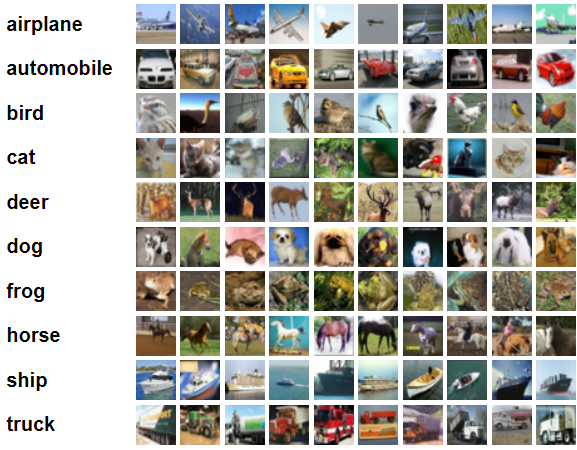


In [1]:
# Installing py7zr for later use.
!pip install py7zr 

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.6/138.6 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.2/384.2 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.6/93.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.1 MB/s eta 0:00:00


# 1. Importing libraries 

In [2]:
# import libraries

from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import py7zr
import glob
import cv2
import random as rd
import copy
%matplotlib inline

# 2. Reading data 

In [3]:
# batch, classes, epochs, Image size.
batch_size = 32
num_classes = 10
epochs = 50
IMG_SIZE = 48

In [4]:
temp_path = '/kaggle/temp/'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
train_file_path = '../input/cifar-10/train.7z'
archive = py7zr.SevenZipFile(train_file_path, mode='r')
archive.extractall(path=temp_path)
archive.close()


In [5]:
images = glob.glob('/kaggle/temp/train/*.png')
len(images)

50000

In [6]:
train_labels = pd.read_csv('../input/cifar-10/trainLabels.csv')
train_labels

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [7]:
train_labels['label'].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

# 3. Data Processing 

In [8]:
LABELS = ['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
          'cat', 'dog', 'airplane']

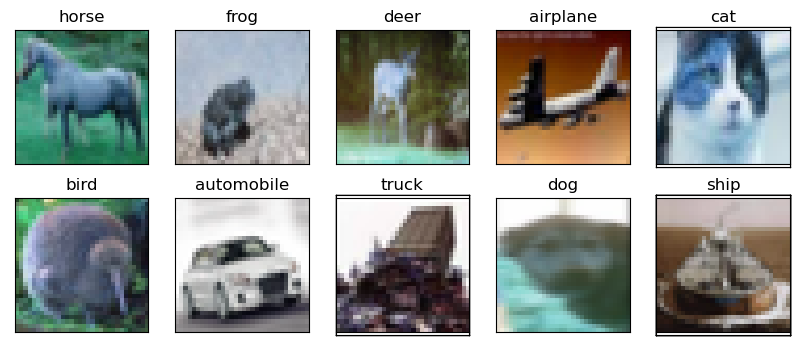

In [9]:
temp_label = ['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
          'cat', 'dog', 'airplane']
fig = plt.figure(figsize=(10, 4))
i = 0
for img in images:
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    label = train_labels.iloc[int(img[19:-4])-1]['label']
    if label in temp_label:
        ax.set_title(label)
        img1 = cv2.imread(img) 
        plt.imshow(img1)
        temp_label.remove(label)
        i+=1
    if len(temp_label) is 0:
        break
plt.show()

In [10]:
X_train = []
Y_train = []

X_val = []
Y_val = []

In [11]:
for img in images:
    prob = rd.random()
    label = train_labels.iloc[int(img[19:-4])-1]['label']
    img_arr = cv2.imread(img)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    if prob > 0.8:
        X_val.append(list(img_arr))
        Y_val.append(LABELS.index(label))
    else:
        X_train.append(list(img_arr))
        Y_train.append(LABELS.index(label))

In [12]:
x_train = np.array(X_train, dtype=np.float32) 
y_train = np.array(Y_train)

x_test = np.array(X_val, dtype=np.float32)
y_test = np.array(Y_val)


In [13]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (39967, 48, 48, 3)
x_test shape: (10033, 48, 48, 3)
y_train shape: (39967,)
y_test shape: (10033,)


In [14]:
# Printing labels
print(y_train[:10])

[5 2 9 0 0 2 4 5 3 2]


In [15]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [16]:
# Printing one hot encoded labels
print(y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
# convert to float, normalise the data

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

# 4. Building basic CNN module 

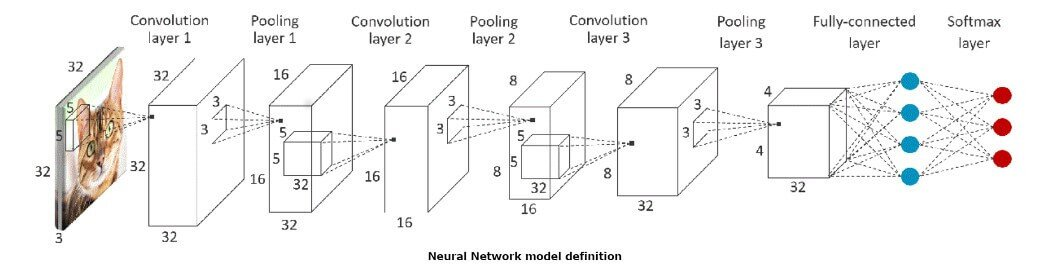 <br>
image courtesy : https://wikidocs.net/165444

In [18]:
# CNN Basic model architecture 

basic_model = Sequential()
basic_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
basic_model.add(Activation('relu'))
basic_model.add(Conv2D(32, (3, 3)))
basic_model.add(Activation('relu'))
basic_model.add(MaxPooling2D(pool_size=(2, 2)))
basic_model.add(Dropout(0.25))

basic_model.add(Conv2D(64, (3, 3), padding='same'))
basic_model.add(Activation('relu'))
basic_model.add(Conv2D(64, (3, 3)))
basic_model.add(Activation('relu'))
basic_model.add(MaxPooling2D(pool_size=(2, 2)))
basic_model.add(Dropout(0.25))

basic_model.add(Flatten())
basic_model.add(Dense(512))
basic_model.add(Activation('relu'))
basic_model.add(Dropout(0.5))
basic_model.add(Dense(num_classes))
basic_model.add(Activation('softmax'))

In [19]:
# summary
basic_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

In [20]:
# compile the model
basic_model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [21]:
# train 
basic_model_history = basic_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1249/1249 [==============================] - 14s 7ms/step - loss: 2.0698 - accuracy: 0.2372 - val_loss: 1.8466 - val_accuracy: 0.3437
Epoch 2/50
1249/1249 [==============================] - 9s 7ms/step - loss: 1.8056 - accuracy: 0.3551 - val_loss: 1.7098 - val_accuracy: 0.4001
Epoch 3/50
1249/1249 [==============================] - 9s 7ms/step - loss: 1.6559 - accuracy: 0.4048 - val_loss: 1.5285 - val_accuracy: 0.4527
Epoch 4/50
1249/1249 [==============================] - 8s 7ms/step - loss: 1.5367 - accuracy: 0.4465 - val_loss: 1.4320 - val_accuracy: 0.4944
Epoch 5/50
1249/1249 [==============================] - 8s 7ms/step - loss: 1.4462 - accuracy: 0.4803 - val_loss: 1.3838 - val_accuracy: 0.5054
Epoch 6/50
1249/1249 [==============================] - 8s 7ms/step - loss: 1.3764 - accuracy: 0.5054 - val_loss: 1.2672 - val_accuracy: 0.5498
Epoch 7/50
1249/1249 [==============================] - 9s 7ms/step - loss: 1.3059 - accuracy: 0.5324 - val_loss: 1.2361 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


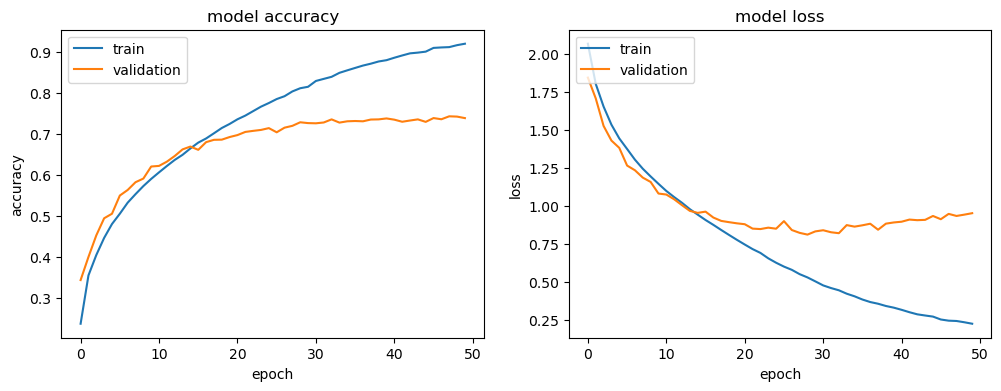

In [22]:
# list all data in history
print(basic_model_history.history.keys())
# summarize history for accuracy
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(basic_model_history.history['accuracy'])
plt.plot(basic_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(basic_model_history.history['loss'])
plt.plot(basic_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 4.1 Observation: 
In the basic model, the model is overfitting as the training accuracy is almost reaching 90+% but validation accuracy is nearly 70%

# 5. CNN model with batch normalization layer 

In [23]:
batch_model = Sequential()
batch_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
batch_model.add(Activation('relu'))
batch_model.add(BatchNormalization())
batch_model.add(Conv2D(32, (3, 3)))
batch_model.add(Activation('relu'))
batch_model.add(BatchNormalization())
batch_model.add(MaxPooling2D(pool_size=(2, 2)))

batch_model.add(Conv2D(64, (3, 3), padding='same'))
batch_model.add(Activation('relu'))
batch_model.add(BatchNormalization())
batch_model.add(Conv2D(64, (3, 3)))
batch_model.add(Activation('relu'))
batch_model.add(BatchNormalization())
batch_model.add(MaxPooling2D(pool_size=(2, 2)))

batch_model.add(Flatten())
batch_model.add(Dense(512))
batch_model.add(Activation('relu'))
batch_model.add(Dropout(0.5))
batch_model.add(Dense(num_classes))
batch_model.add(Activation('softmax'))

In [24]:
# summary of the model
print(batch_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                      

In [25]:
# compile
batch_model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [26]:
# Training the model
batch_model_history = batch_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1249/1249 [==============================] - 11s 8ms/step - loss: 1.6273 - accuracy: 0.4367 - val_loss: 1.2787 - val_accuracy: 0.5408
Epoch 2/50
1249/1249 [==============================] - 9s 7ms/step - loss: 1.1833 - accuracy: 0.5802 - val_loss: 1.1405 - val_accuracy: 0.5977
Epoch 3/50
1249/1249 [==============================] - 9s 7ms/step - loss: 0.9963 - accuracy: 0.6471 - val_loss: 0.9558 - val_accuracy: 0.6650
Epoch 4/50
1249/1249 [==============================] - 9s 7ms/step - loss: 0.8678 - accuracy: 0.6907 - val_loss: 0.8736 - val_accuracy: 0.6918
Epoch 5/50
1249/1249 [==============================] - 9s 7ms/step - loss: 0.7620 - accuracy: 0.7316 - val_loss: 0.8577 - val_accuracy: 0.7049
Epoch 6/50
1249/1249 [==============================] - 10s 8ms/step - loss: 0.6706 - accuracy: 0.7631 - val_loss: 0.8139 - val_accuracy: 0.7223
Epoch 7/50
1249/1249 [==============================] - 9s 7ms/step - loss: 0.5868 - accuracy: 0.7919 - val_loss: 0.8393 - val_accurac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


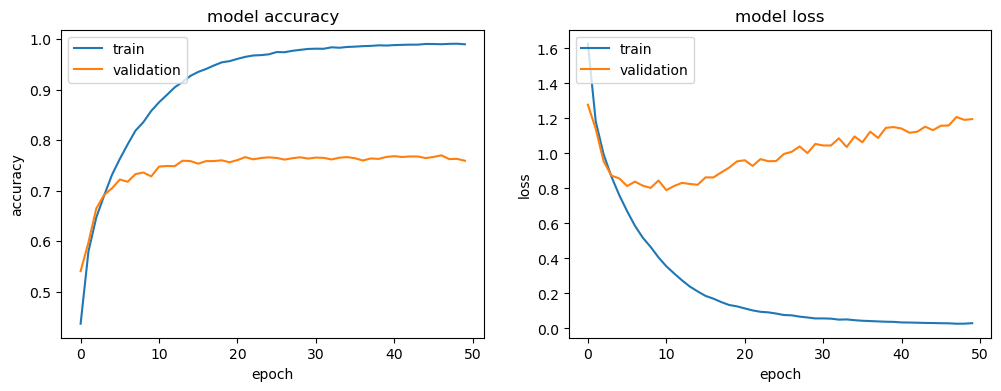

In [27]:
# list all data in history
print(batch_model_history.history.keys())
# summarize history for accuracy
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(batch_model_history.history['accuracy'])
plt.plot(batch_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(batch_model_history.history['loss'])
plt.plot(batch_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 5.1 Observation: 
with just adding batch normalisation, overfitting problem have increased, but on the other hand accuracy of training set is nealry 99%. The increase in accuracy is a good sign but we need to adress overfitting. 
Dropout and regularisation can help in this case, next build a model with the same.

# 6. CNN model with dropout layer with L2 regularization.

In [28]:
dropout_model = Sequential()
dropout_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
dropout_model.add(Activation('relu'))
dropout_model.add(BatchNormalization())
dropout_model.add(Conv2D(32, (3, 3)))
dropout_model.add(Activation('relu'))
dropout_model.add(BatchNormalization())
dropout_model.add(MaxPooling2D(pool_size=(2, 2)))
dropout_model.add(Dropout(0.20))

dropout_model.add(Conv2D(64, (3, 3), padding='same'))
dropout_model.add(Activation('relu'))
dropout_model.add(BatchNormalization())
dropout_model.add(Conv2D(64, (3, 3)))
dropout_model.add(Activation('relu'))
dropout_model.add(BatchNormalization())
dropout_model.add(MaxPooling2D(pool_size=(2, 2)))
dropout_model.add(Dropout(0.20))

dropout_model.add(Flatten())
dropout_model.add(Dense(512, kernel_regularizer=l2(0.01)))
dropout_model.add(Activation('relu'))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(num_classes))
dropout_model.add(Activation('softmax'))


In [29]:
print(dropout_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 46, 46, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                      

In [30]:
# compile
dropout_model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [31]:
dropout_model_history = dropout_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1249/1249 [==============================] - 12s 9ms/step - loss: 9.2053 - accuracy: 0.4002 - val_loss: 7.1308 - val_accuracy: 0.5337
Epoch 2/50
1249/1249 [==============================] - 10s 8ms/step - loss: 5.8771 - accuracy: 0.5464 - val_loss: 4.7035 - val_accuracy: 0.6073
Epoch 3/50
1249/1249 [==============================] - 10s 8ms/step - loss: 3.9449 - accuracy: 0.6199 - val_loss: 3.2927 - val_accuracy: 0.6413
Epoch 4/50
1249/1249 [==============================] - 10s 8ms/step - loss: 2.7733 - accuracy: 0.6641 - val_loss: 2.3872 - val_accuracy: 0.6797
Epoch 5/50
1249/1249 [==============================] - 10s 8ms/step - loss: 2.0477 - accuracy: 0.7022 - val_loss: 1.8548 - val_accuracy: 0.7006
Epoch 6/50
1249/1249 [==============================] - 10s 8ms/step - loss: 1.6054 - accuracy: 0.7315 - val_loss: 1.4978 - val_accuracy: 0.7321
Epoch 7/50
1249/1249 [==============================] - 10s 8ms/step - loss: 1.3336 - accuracy: 0.7504 - val_loss: 1.3731 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


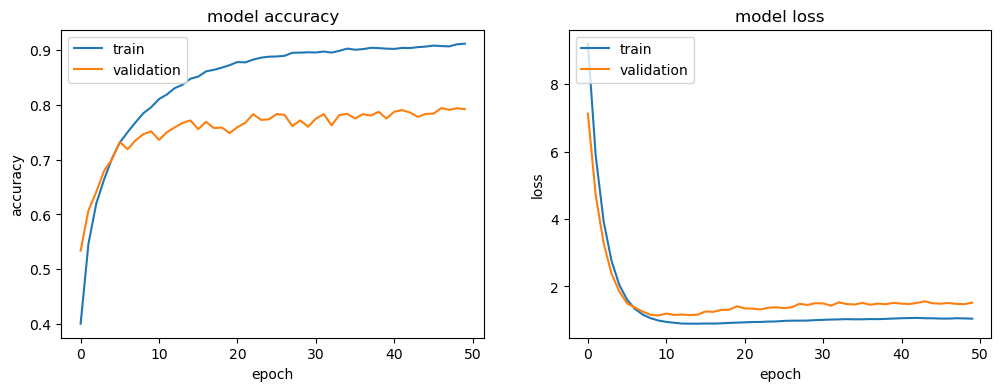

In [32]:
# list all data in history
print(dropout_model_history.history.keys())
# summarize history for accuracy
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(dropout_model_history.history['accuracy'])
plt.plot(dropout_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(dropout_model_history.history['loss'])
plt.plot(dropout_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 6.1 Observation: 
Overfitting problem is almost adressed as the difference between train and validation set is reduced by almost 10%. In ealrier model difference was nearly 20% and with new model it's 10% and good accuracy is maintied. This model is quite suitable for genralised model.
In next by experiemnt will add few more layers to check for any improvements and changes.

# 7. Adding more CNN layers 

In [33]:
more_layer_model = Sequential()
more_layer_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
more_layer_model.add(Activation('relu'))
more_layer_model.add(BatchNormalization())
more_layer_model.add(Conv2D(32, (3, 3)))
more_layer_model.add(Activation('relu'))
more_layer_model.add(BatchNormalization())
more_layer_model.add(MaxPooling2D(pool_size=(2, 2)))
more_layer_model.add(Dropout(0.20))

more_layer_model.add(Conv2D(64, (3, 3), padding='same'))
more_layer_model.add(Activation('relu'))
more_layer_model.add(BatchNormalization())
more_layer_model.add(Conv2D(64, (3, 3)))
more_layer_model.add(Activation('relu'))
more_layer_model.add(BatchNormalization())
more_layer_model.add(MaxPooling2D(pool_size=(2, 2)))
more_layer_model.add(Dropout(0.20))

more_layer_model.add(Conv2D(128, (3, 3), padding='same'))
more_layer_model.add(Activation('relu'))
more_layer_model.add(BatchNormalization())
more_layer_model.add(Conv2D(128, (3, 3)))
more_layer_model.add(Activation('relu'))
more_layer_model.add(BatchNormalization())
more_layer_model.add(MaxPooling2D(pool_size=(2, 2)))
more_layer_model.add(Dropout(0.20))

more_layer_model.add(Flatten())
more_layer_model.add(Dense(512,kernel_regularizer=l2(0.01)))
more_layer_model.add(Activation('relu'))
more_layer_model.add(Dropout(0.5))
more_layer_model.add(Dense(num_classes))
more_layer_model.add(Activation('softmax'))

In [34]:
print(more_layer_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 activation_18 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 46, 46, 32)        9248      
                                                                 
 activation_19 (Activation)  (None, 46, 46, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                      

In [35]:
# compile
more_layer_model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [36]:
more_layer_model_history = more_layer_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1249/1249 [==============================] - 12s 9ms/step - loss: 8.2026 - accuracy: 0.3814 - val_loss: 6.3448 - val_accuracy: 0.5124
Epoch 2/50
1249/1249 [==============================] - 11s 9ms/step - loss: 5.2825 - accuracy: 0.5122 - val_loss: 4.3731 - val_accuracy: 0.5357
Epoch 3/50
1249/1249 [==============================] - 11s 9ms/step - loss: 3.5575 - accuracy: 0.5927 - val_loss: 2.9310 - val_accuracy: 0.6291
Epoch 4/50
1249/1249 [==============================] - 11s 8ms/step - loss: 2.5037 - accuracy: 0.6460 - val_loss: 2.2359 - val_accuracy: 0.6345
Epoch 5/50
1249/1249 [==============================] - 11s 9ms/step - loss: 1.8544 - accuracy: 0.6832 - val_loss: 1.6960 - val_accuracy: 0.6779
Epoch 6/50
1249/1249 [==============================] - 11s 9ms/step - loss: 1.4549 - accuracy: 0.7091 - val_loss: 1.3056 - val_accuracy: 0.7257
Epoch 7/50
1249/1249 [==============================] - 10s 8ms/step - loss: 1.2003 - accuracy: 0.7311 - val_loss: 1.3358 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


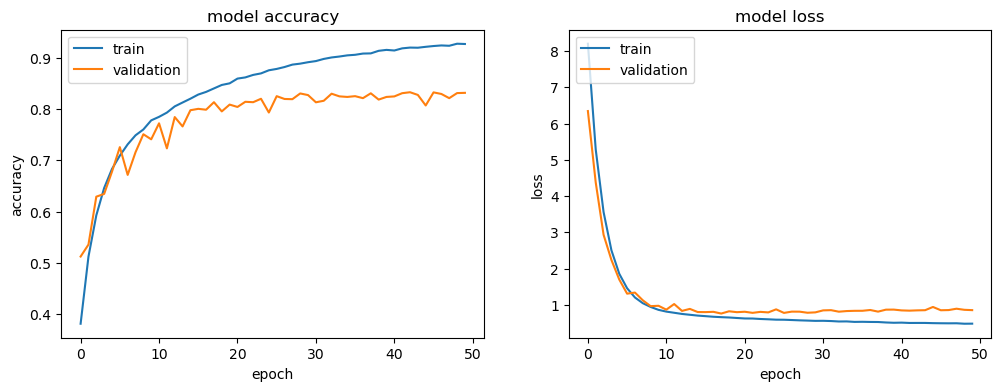

In [37]:
# list all data in history
print(more_layer_model_history.history.keys())
# summarize history for accuracy
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(more_layer_model_history.history['accuracy'])
plt.plot(more_layer_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(more_layer_model_history.history['loss'])
plt.plot(more_layer_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 7.1 Observation: 
This model did help in incresing the validation accuracy so the confidence on unseen data for this model will be better. will use this model for testing and further evaluation.

# 8. Evaluation on test data and submission.

In [38]:
import shutil
from py7zr import unpack_7zarchive
shutil.register_unpack_format('7zip',['.7z'],unpack_7zarchive)
shutil.unpack_archive('/kaggle/input/cifar-10/test.7z','/kaggle/temp/test')
shutil.unregister_unpack_format('7zip')
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [39]:
test_gen = test_datagen.flow_from_directory(directory='/kaggle/temp/test',\
                                            target_size=(IMG_SIZE,IMG_SIZE),batch_size=64,class_mode=None,shuffle=False)


Found 300000 images belonging to 1 classes.


In [40]:
test_gen.reset()
predictions_vecs = more_layer_model.predict(test_gen)
predictions_final = np.argmax(predictions_vecs, axis=1)
print(predictions_vecs)

4688/4688 [==============================] - 123s 26ms/step
[[1.0223738e-06 1.4428939e-02 8.1924343e-01 ... 1.8806404e-05
  7.3548006e-07 1.6536007e-02]
 [2.8977823e-02 6.5131265e-01 3.8842615e-02 ... 7.7551708e-02
  2.6519512e-04 6.8473890e-03]
 [5.4784289e-07 2.8139147e-09 9.9810684e-01 ... 2.5078656e-05
  1.8267630e-06 2.6051549e-07]
 ...
 [2.2614940e-05 1.4952883e-01 4.9056254e-02 ... 6.7483371e-01
  7.5248969e-03 7.5014494e-03]
 [7.3132180e-03 8.0443531e-01 1.9603755e-04 ... 2.2935320e-02
  1.3692057e-03 2.6559114e-04]
 [3.7055265e-02 5.1443424e-04 1.7441843e-03 ... 3.8221707e-03
  1.5290731e-04 6.9385933e-05]]


In [41]:
print(predictions_final)

[2 1 2 ... 7 1 6]


In [42]:
sub = pd.read_csv('../input/cifar-10/sampleSubmission.csv',header='infer')

In [43]:
predicted_classes=np.empty(shape=300000,dtype=np.dtype('U20'))

ind=0
for i in predictions_final.tolist():
    predicted_classes[ind]=LABELS[i]
    ind=ind+1
    
filenames_wo_ext = []
for fname in test_gen.filenames:
    filenames_wo_ext.append(int(fname.split(sep="/")[1].split(sep=".")[0])-1)

predicted_classes_final = np.empty(shape=300000,dtype=np.dtype('U20'))
predicted_classes_final[filenames_wo_ext]=predicted_classes

In [44]:
sub['label'] = predicted_classes_final
sub.to_csv('submission.csv',index=False)

In [45]:
sub.tail(10)

,id,label
299990,299991,ship
299991,299992,truck
299992,299993,frog
299993,299994,deer
299994,299995,frog
299995,299996,ship
299996,299997,frog
299997,299998,deer
299998,299999,truck
299999,300000,automobile


# *********END********